In [130]:
# For the NOAA data buoys I would choose this one as an important and representative example:
# Station MOK1  (Station Page) in Kaneohe Bay (MOK for Moku o Loe, Coconut Island, where HIMB is).
# http://www.ndbc.noaa.gov/station_page.php?station=mokh1
#      [displays station, past 24 hrs of data, links to older data at the bottom of the page]
#      "real-time data" shows the past 45 days
#      "historic data" shows past years by year, current year downloadable by month

# Historic data is probably the best to use for a first example since it's stable (quality checked, not provisional)
# and comes in reasonably big and useful chunks.
  
# The variable we care about for corals is collected as part of "standard meteorological data" suite, 
# and is Sea Surface Temperature, column heading WTMP in NOAA data files.
# "WTMP Sea surface temperature (Celsius). For buoys the depth is referenced to the hull's waterline. 
# For fixed platforms it varies with tide, but is referenced to, or near Mean Lower Low Water (MLLW)."
# - from http://www.ndbc.noaa.gov/measdes.shtml . 

# Example 1: I need to plot sea surface temperature (SST) data for 2014 and 2015 (bleaching years)., 
#     The historic data is stable, available for a year at a time, and comes in a slightly different text 
#     format than more recent data. I would find that linked from the Station Page as "historic data" link at the bottom:
# http://www.ndbc.noaa.gov/station_history.php?station=mokh1

#     From the historic data page http://www.ndbc.noaa.gov/station_history.php?station=mokh1
# I choose historic -- standard meteorological data -- click on year links (2014) and choose .txt or .gz
# (mokh1h2014.txt is at http://www.ndbc.noaa.gov/view_text_file.php?filename=mokh1h2014.txt.gz&dir=data/historical/stdmet/)
# (mokh1h2014.txt.gz is at http://www.ndbc.noaa.gov/data/historical/stdmet/mokh1h2014.txt.gz)

# One exercise I've done in R (presumably also doable in Python) is to download and plot 
# these datasets for a year at a time, or multiple years overlaid on an annual axis to see 
# variation, x axis running Jan-Dec (watch out for leap years). 
# There's some work required in (1) aggregating the parsed date and time into reasonable 
# columns to use for plotting (2) checking for and filling in missing date or time gaps with NA or blanks, 
# and converting the ubiquitous 999 to NA or blanks, (3) subsampling the data at regular intervals 
# if you just don't want to fool with that size dataset (first reading of the day) or 
# aggregating (daily average) - some of these interval choices or time averages may be impacted 
# by high-frequency down times (assumed to be equipment maintenance or self-checks), and especially 
# (4) potentially harvesting or exporting the resulting csv to use in other programs (a very common need), 
# in the process deleting columns of no interest. (5) Also - if I recall, NOAA .txt datasets have 2 (maybe 3) 
# top lines taken up in specifying column header information, and for any reasonable kind of downstream use, 
# one will want to export a clean csv with column headings of: one line only, no spaces or special characters, 
# only numbers letters dashes and underscores, maybe the ability to rename with something more explicit like 
# WaterTemp_degC instead of  WTMP (which even today took some lookup time to rediscover/re-remember 
# that WTMP actually meant SST). 

# Additional feature. It can be useful to add to the graph (1) a straight horizontal line of one's 
# choosing (e.g., mean annual temperature, or user-specified physiological tolerance temperature thresholds for 
#           (a) coral stress or (b) coral death). 

# Additional feature. With access to many years' worth of data, it would also be useful to plot selected years 
# along with an average temperature (same time interval as the year being plotted - such as daily) for 
# the past decade, or all years, to compare magnitude and timing of temperature spikes during bleaching years 
# to the usual temperature for that time of year (and the user knowing from other data, such as field observations,
# when the first signs of bleaching or paling were seen for that year).

# Additional feature. Note that the "bleaching season" tends to occur in the fall, so to observe 
# full warming and recovery cycles, people might want to offset the starting month (Apr-Mar rather than Jan-Dec). 
# Nice but maybe later, as with the other "additional features").


In [131]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, date, time

In [132]:
def parse(year, month, day, hour, minute, second):
    return year+ '-' +month+ '-' +day+ ' ' +hour+ ':' +minute+ ':' +second

In [133]:
# file we are working with
# file1_url = "http://www.ndbc.noaa.gov/view_text_file.php?filename=mokh1h2014.txt.gz&dir=data/historical/stdmet/"
file1_local = 'mokh1h2014.txt'
file2_local = 'mokh1h2015.txt'

In [134]:
# data = urllib.request.urlopen(file1_url) 
# df = pd.read_csv(data, delim_whitespace=True, header=0, na_values=['99.0','999.0','99.00','999','9999.0' ])
df = pd.read_csv(file1_local, delim_whitespace=True, header=[0,1], na_values=['99.0','999.0','99.00','999','9999.0' ])
df2= pd.read_csv(file2_local, delim_whitespace=True, header = [0,1], na_values =['99.0','999.0','99.00','999','9999.0' ])
# for line in data:
#     print(line)

In [135]:
df.fillna('')
df2.fillna('')
df.columns.values,df2.columns.values

(array([('#YY', '#yr'), ('MM', 'mo'), ('DD', 'dy'), ('hh', 'hr'),
        ('mm', 'mn'), ('WDIR', 'degT'), ('WSPD', 'm/s'), ('GST', 'm/s'),
        ('WVHT', 'm'), ('DPD', 'sec'), ('APD', 'sec'), ('MWD', 'degT'),
        ('PRES', 'hPa'), ('ATMP', 'degC'), ('WTMP', 'degC'),
        ('DEWP', 'degC'), ('VIS', 'mi'), ('TIDE', 'ft')], dtype=object),
 array([('#YY', '#yr'), ('MM', 'mo'), ('DD', 'dy'), ('hh', 'hr'),
        ('mm', 'mn'), ('WDIR', 'degT'), ('WSPD', 'm/s'), ('GST', 'm/s'),
        ('WVHT', 'm'), ('DPD', 'sec'), ('APD', 'sec'), ('MWD', 'degT'),
        ('PRES', 'hPa'), ('ATMP', 'degC'), ('WTMP', 'degC'),
        ('DEWP', 'degC'), ('VIS', 'mi'), ('TIDE', 'ft')], dtype=object))

In [136]:
df['dates'] = pd.to_datetime("'2016-11-06'".replace("'",""))

# for index, row in df.iterrows():
#     row['Date'] = date(row['#YY'], row['MM'], row['DD'])


In [137]:
#Creates a datetime object based on the dates and times and appends to the existing dataframe

#operation on the first data frame
df_temp = df[['#YY', 'MM','DD','hh','mm']].copy()
df_temp.columns = ['year', 'month', 'day', 'hour', 'minute']
df_temp = pd.to_datetime(df_temp)

df_temp = pd.DataFrame({'date_time': df_temp})
df = pd.concat([df,df_temp], axis = 1)

#operation on the second data frame

df_temp = df2[['#YY', 'MM','DD','hh','mm']].copy()
df_temp.columns = ['year', 'month', 'day', 'hour', 'minute']
df_temp = pd.to_datetime(df_temp)

df_temp = pd.DataFrame({'date_time': df_temp})
df2 = pd.concat([df2,df_temp], axis = 1)

df_uncorrupted = df
df2_uncorrupted =df2

Populating the interactive namespace from numpy and matplotlib


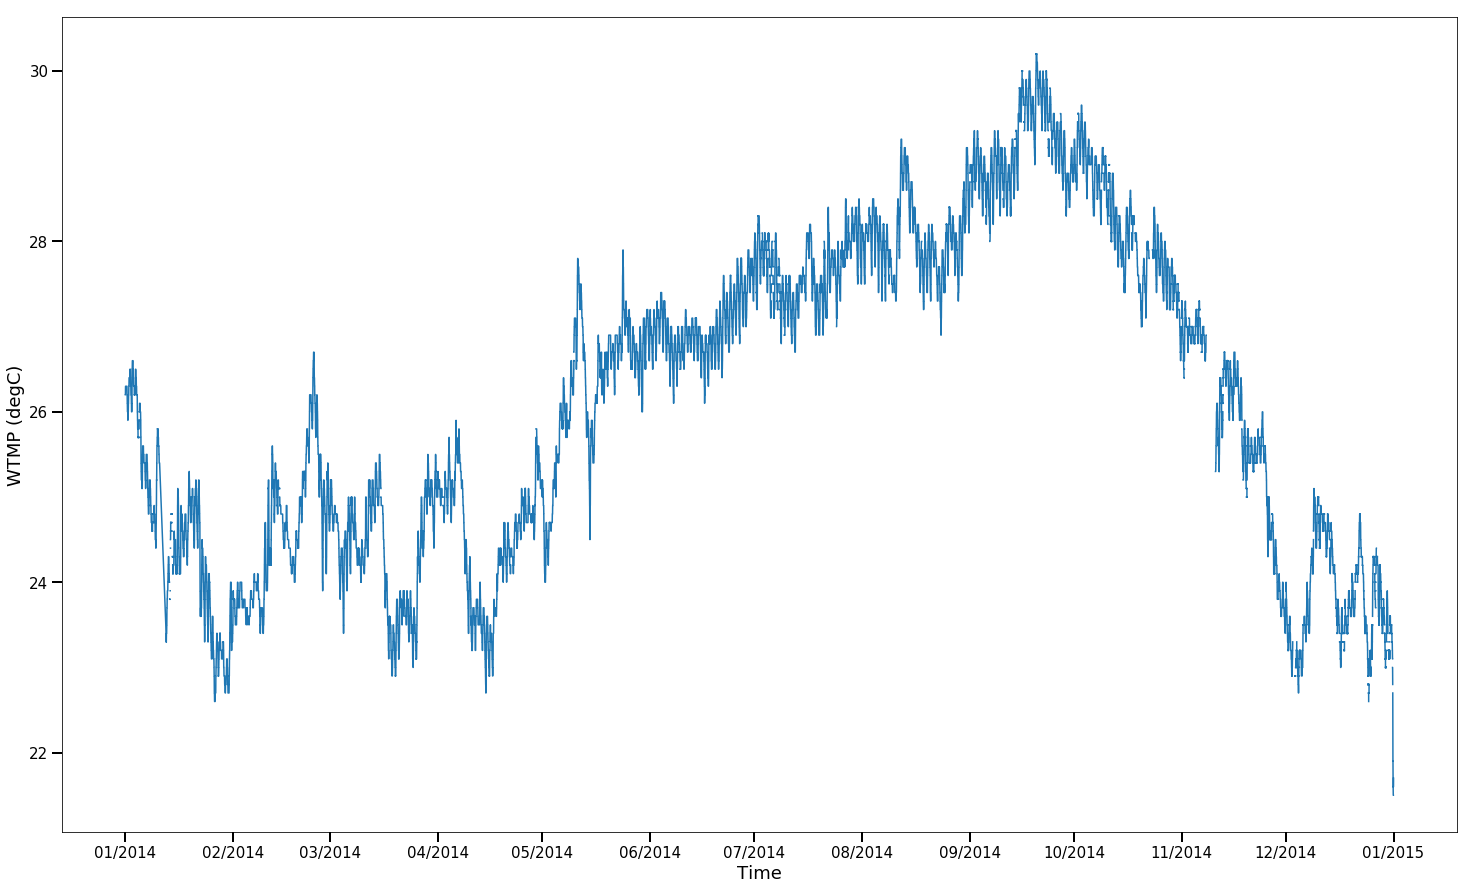

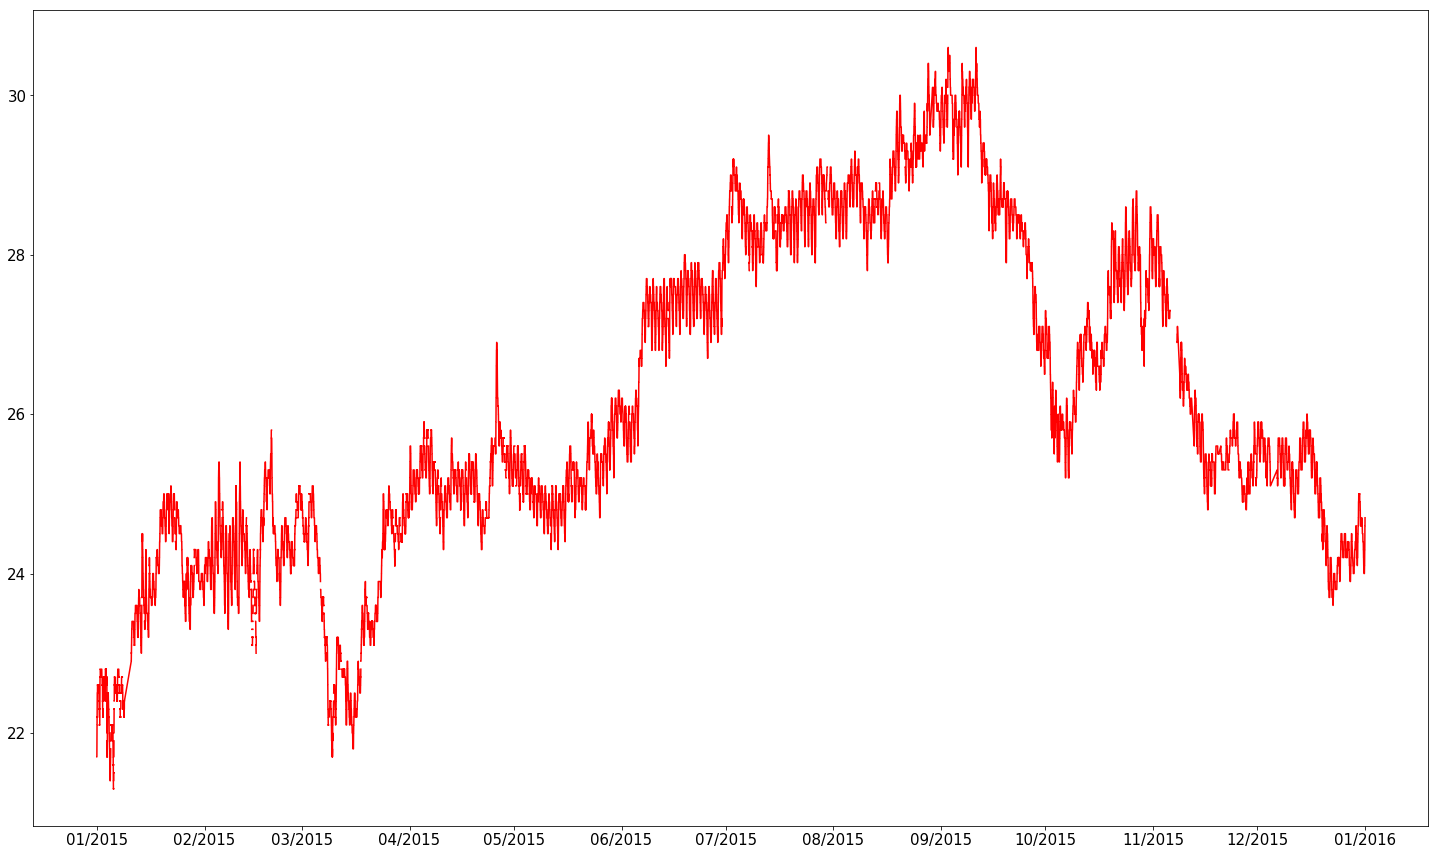

In [138]:
# Example plot of the image based on values of WTMP (Can be changed to other variables)

#Sets the size of the figure in the notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (25, 15)


#Plots the figure, configures settings about the plot
plt.plot(df['date_time'],df['WTMP','degC'])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

#fontsize of the tick labels
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize = 15)

#Size of ticks
plt.tick_params(direction='out', length=10, width=2,)

#X and Y labels
plt.xlabel('Time',fontsize=18)
plt.ylabel('WTMP (degC)',fontsize=18)

plt.show()

#Second Plot

plt.plot(df2['date_time'],df2['WTMP','degC'],color = 'red')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.show()


In [143]:
#df['date_time'] = datetime.datetime.today().replace(year = 2000)
#pv = pd.DataFrame(columns = [df['WTMP','degC'],df2['WTMP','degC']])
#df2['date_time'] = datetime.datetime.today().replace(year = 2000)
df_uncorrupted['date_time']

0       2000-02-19 16:42:31.443
1       2000-02-19 16:42:31.443
2       2000-02-19 16:42:31.443
3       2000-02-19 16:42:31.443
4       2000-02-19 16:42:31.443
5       2000-02-19 16:42:31.443
6       2000-02-19 16:42:31.443
7       2000-02-19 16:42:31.443
8       2000-02-19 16:42:31.443
9       2000-02-19 16:42:31.443
10      2000-02-19 16:42:31.443
11      2000-02-19 16:42:31.443
12      2000-02-19 16:42:31.443
13      2000-02-19 16:42:31.443
14      2000-02-19 16:42:31.443
15      2000-02-19 16:42:31.443
16      2000-02-19 16:42:31.443
17      2000-02-19 16:42:31.443
18      2000-02-19 16:42:31.443
19      2000-02-19 16:42:31.443
20      2000-02-19 16:42:31.443
21      2000-02-19 16:42:31.443
22      2000-02-19 16:42:31.443
23      2000-02-19 16:42:31.443
24      2000-02-19 16:42:31.443
25      2000-02-19 16:42:31.443
26      2000-02-19 16:42:31.443
27      2000-02-19 16:42:31.443
28      2000-02-19 16:42:31.443
29      2000-02-19 16:42:31.443
                  ...          
86842   

In [140]:
d = pd.merge(left=df, left_on='date_time',
         right=df2, right_on='date_time')
d

,"('#YY', '#yr')_x","('MM', 'mo')_x","('DD', 'dy')_x","('hh', 'hr')_x","('mm', 'mn')_x","('WDIR', 'degT')_x","('WSPD', 'm/s')_x","('GST', 'm/s')_x","('WVHT', 'm')_x","('DPD', 'sec')_x",...,"('WVHT', 'm')_y","('DPD', 'sec')_y","('APD', 'sec')_y","('MWD', 'degT')_y","('PRES', 'hPa')_y","('ATMP', 'degC')_y","('WTMP', 'degC')_y","('DEWP', 'degC')_y","('VIS', 'mi')_y","('TIDE', 'ft')_y"
